In [1]:
import pandas
import numpy
from astropy.io import fits
from astropy import wcs
from matplotlib import pyplot
from rdp import rdp

In [2]:
%matplotlib inline

In [3]:
cans = pandas.read_csv('../data/candidates.csv')
cans.head()

,path,label
0,/lamost/EG034015N073506B04/spec-56207-EG034015...,0
1,/lamost/EG034015N073506B04/spec-56207-EG034015...,0
2,/lamost/EG035637N030328B01/spec-56219-EG035637...,0
3,/lamost/EG035637N030328B01/spec-56219-EG035637...,0
4,/lamost/EG035637N030328B01/spec-56219-EG035637...,0


In [4]:
idx = 0

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


idx: 0
path: /lamost/EG034015N073506B04/spec-56207-EG034015N073506B04_sp15-210.fits
1.05


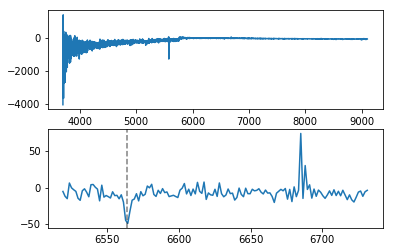

In [5]:
path = cans.loc[idx, 'path']

with fits.open(path) as hdulist:
    header = hdulist[0].header
    sn_r = header['SN_R']
    pixcr = numpy.arange(header['NAXIS1']).reshape(-1, 1)[:, [0, 0]]
    wave = 10 ** wcs.WCS(header).wcs_pix2world(pixcr, 0)[:, 0]
    flux = hdulist[0].data[0]
    halpha_idx = (wave >= 6519) & (wave <= 6732)
    halpha_flux = flux[halpha_idx]
    halpha_wave = wave[halpha_idx]

fig, (ax1, ax2) = pyplot.subplots(nrows=2)
ax1.plot(wave, flux)
ax2.plot(halpha_wave, halpha_flux)
ax2.axvline(6564, color='black', alpha=0.5, ls='dashed')

print('idx:', idx)
print('path:', path)
print(sn_r)

idx += 1

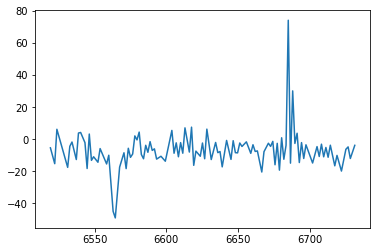

In [6]:
# https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm
coords = numpy.concatenate([halpha_wave, halpha_flux]).reshape(2, -1).T
# TODO this is wrong
e = 1 / sn_r
points = rdp(coords, epsilon=e)
pyplot.plot(points[:, 0], points[:, 1])

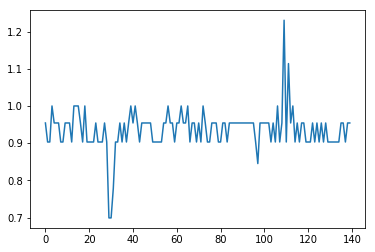

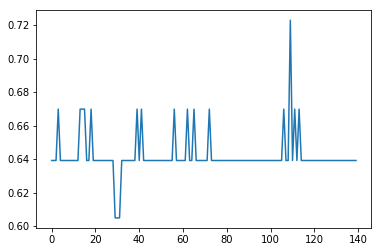

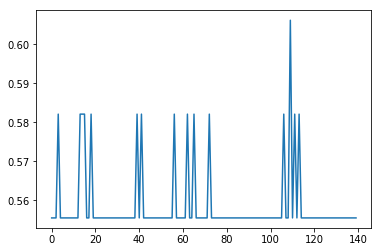

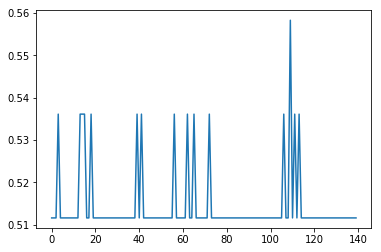

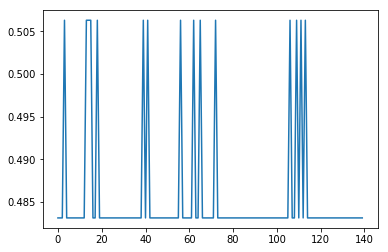

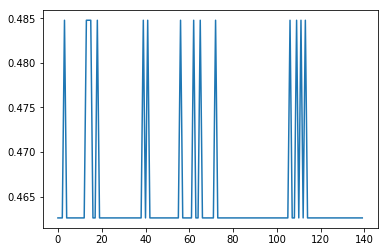

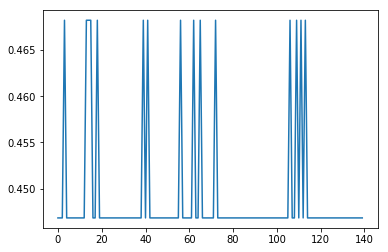

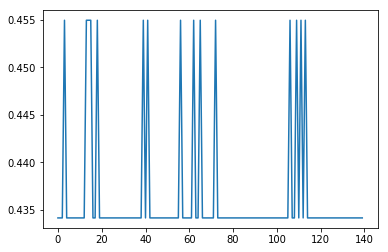

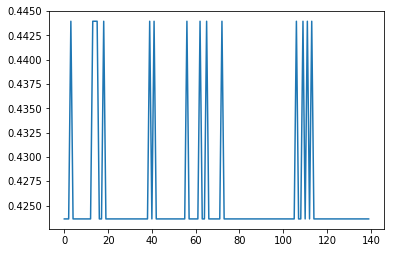

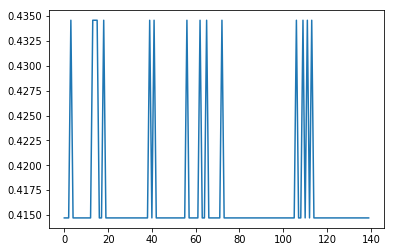

In [7]:
# https://en.wikipedia.org/wiki/Fractal_dimension
# https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
box_size = numpy.linspace(10, 200, 10)
fig = pyplot.figure()
pyplot.ion()
for b in box_size:
    pyplot.clf()
    x = flux[halpha_idx]
    foo = x.reshape(-1, 1) // b
    bar = numpy.log(foo + 10) / numpy.log(1. / b)
    pyplot.plot(-bar)
    pyplot.show()